In [1]:
from matplotlib import pyplot as plt
from pywave.energy_transport.lib import solve_2d_ode_spectral, get_evec, get_evec_aux
import numpy as np

In [2]:
def get_lams_evecs(a, b, c, d):
    """
    return eigenvalues and eigenvectors calculated with numpy
    eigenvectors in rows
    """
    mat = np.array([[a[0],b[0]],[c[0],d[0]]])
    lams, evecs = np.linalg.eig(mat)
    lams = lams.real
    evecs = evecs.real.T # eigenvectors now in rows
    for lam, evec in zip(lams, evecs):
        print(lam, evec)
    return lams, evecs

# Diagonal matrix operators
- simple exponential decay for eigenvectors

In [5]:
u0 = np.array([1.])
v0 = np.array([1.])
gamma = .1
a = np.full_like(u0, -gamma)
b = np.zeros_like(u0)
c = np.zeros_like(u0)
d = np.zeros_like(u0) # v won't change here

In [4]:
t = np.arange(10)
u,v = solve_2d_ode_spectral(u0, v0, t, a, b, c, d)
u,v

(array([[1.        ],
        [0.90483742],
        [0.81873075],
        [0.74081822],
        [0.67032005],
        [0.60653066],
        [0.54881164],
        [0.4965853 ],
        [0.44932896],
        [0.40656966]]),
 array([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.]]))

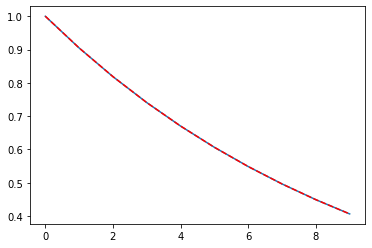

In [6]:
plt.plot(t,np.exp(-gamma*t))
plt.plot(t,u,'--r')

In [10]:
u0 = np.array([1.])
v0 = np.array([1.])
a = np.full_like(u0, -gamma)
b = np.zeros_like(u0)
c = np.zeros_like(u0)
d = np.full_like(u0, -gamma)

In [11]:
t = np.arange(10)
u,v = solve_2d_ode_spectral(u0, v0, t, a, b, c, d)
u,v

(array([[1.        ],
        [0.90483742],
        [0.81873075],
        [0.74081822],
        [0.67032005],
        [0.60653066],
        [0.54881164],
        [0.4965853 ],
        [0.44932896],
        [0.40656966]]),
 array([[1.        ],
        [0.90483742],
        [0.81873075],
        [0.74081822],
        [0.67032005],
        [0.60653066],
        [0.54881164],
        [0.4965853 ],
        [0.44932896],
        [0.40656966]]))

# Isotropic scattering
- no change for 1st eigenvector
- exponential decay for 2nd eigenvector

In [12]:
# isotropic case - exponential decay for 2nd eigenvector
u0 = np.array([1.])
v0 = -np.array([1.])
alpha = .1
gamma = 0
a = np.full_like(u0, -alpha -gamma)
b = np.full_like(u0, alpha)
c = np.full_like(u0, alpha)
d = np.full_like(u0, -alpha -gamma)
print(((a,b),(c,d)))

((array([-0.1]), array([0.1])), (array([0.1]), array([-0.1])))


In [13]:
lams, (evec0, evec1) = get_lams_evecs(a, b, c, d)

0.0 [0.70710678 0.70710678]
-0.2 [-0.70710678  0.70710678]


In [14]:
t = np.arange(10)
u,v = solve_2d_ode_spectral(u0, v0, t, a, b, c, d)
u,v

(array([[1.        ],
        [0.81873075],
        [0.67032005],
        [0.54881164],
        [0.44932896],
        [0.36787944],
        [0.30119421],
        [0.24659696],
        [0.20189652],
        [0.16529889]]),
 array([[-1.        ],
        [-0.81873075],
        [-0.67032005],
        [-0.54881164],
        [-0.44932896],
        [-0.36787944],
        [-0.30119421],
        [-0.24659696],
        [-0.20189652],
        [-0.16529889]]))

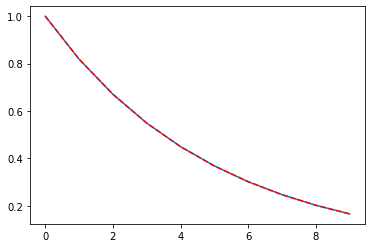

In [15]:
plt.plot(t,np.exp(lams[1]*t))
plt.plot(t,u,'--r')

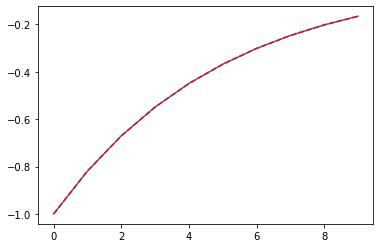

In [16]:
plt.plot(t,-np.exp(lams[1]*t))
plt.plot(t,v,'--r')

In [17]:
# isotropic case - nothing happens to zero eigenvector
u0 = np.array([1.])
v0 = np.array([1.])
t = np.arange(10)
u,v = solve_2d_ode_spectral(u0, v0, t, a, b, c, d)
u,v

(array([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.]]),
 array([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.]]))

# Anisotropic scattering
- with no dissipation
  - eigenvector is unchanged
  - auxiliary vector (orthogonal to eigenvector) grows linearly
- with dissipation
  - both decay exponentially with attenuation coefficient $\gamma$

In [18]:
# anisotropic case with dissipation - exponential decay for eigenvector
u0 = np.array([1.])
v0 = -np.array([1.])
alpha = .1
gamma = 0.1
a = np.full_like(u0, -alpha - gamma)
b = np.full_like(u0, -alpha)
c = np.full_like(u0, alpha)
d = np.full_like(u0, alpha - gamma)
print(((a,b),(c,d)))

((array([-0.2]), array([-0.1])), (array([0.1]), array([0.])))


In [19]:
lams, (evec0, evec1) = get_lams_evecs(a, b, c, d)

-0.1 [-0.70710678  0.70710678]
-0.1 [-0.70710678  0.70710678]


In [20]:
t = np.arange(10)
u,v = solve_2d_ode_spectral(u0, v0, t, a, b, c, d)
u,v

(array([[1.        ],
        [0.90483742],
        [0.81873075],
        [0.74081822],
        [0.67032005],
        [0.60653066],
        [0.54881164],
        [0.4965853 ],
        [0.44932896],
        [0.40656966]]),
 array([[-1.        ],
        [-0.90483742],
        [-0.81873075],
        [-0.74081822],
        [-0.67032005],
        [-0.60653066],
        [-0.54881164],
        [-0.4965853 ],
        [-0.44932896],
        [-0.40656966]]))

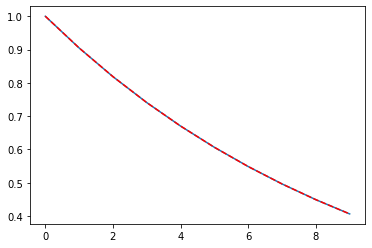

In [21]:
plt.plot(t,np.exp(lams[1]*t))
plt.plot(t,u,'--r')

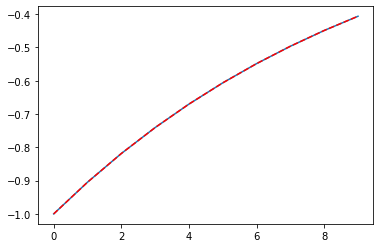

In [22]:
plt.plot(t,-np.exp(lams[1]*t))
plt.plot(t,v,'--r')

In [23]:
ev0, ev1, aux0, aux1, aux_fac = get_evec_aux(lams[:1],a,b,c,d)
ev0, ev1, aux0, aux1

(array([-0.70710678]),
 array([0.70710678]),
 array([0.70710678]),
 array([0.70710678]))

In [24]:
# check eigenvector is found correctly
(a-lams[0])*ev0 + b*ev1, c*ev0 + (d-lams[0])*ev1

(array([0.]), array([0.]))

In [25]:
# check aux sat's the right equation
print((a-lams[0])*aux0 + b*aux1, c*aux0 + (d-lams[0])*aux1)
print(aux_fac*evec0)

[-0.14142136] [0.14142136]
[-0.14142136  0.14142136]


In [26]:
# anisotropic case with dissipation - exp(lam*t)*(aux_fac*t*ev+aux) evolution for auxiliary vector
u0 = np.array([1.])
v0 = np.array([1.])
t = np.arange(10)
u,v = solve_2d_ode_spectral(u0, v0, t, a, b, c, d)
u,v

(array([[ 1.00000000e+00],
        [ 7.23869934e-01],
        [ 4.91238452e-01],
        [ 2.96327288e-01],
        [ 1.34064009e-01],
        [-1.11022302e-16],
        [-1.09762327e-01],
        [-1.98634122e-01],
        [-2.69597378e-01],
        [-3.25255728e-01]]),
 array([[1.        ],
        [1.0858049 ],
        [1.14622305],
        [1.18530915],
        [1.20657608],
        [1.21306132],
        [1.2073856 ],
        [1.19180473],
        [1.16825531],
        [1.13839505]]))

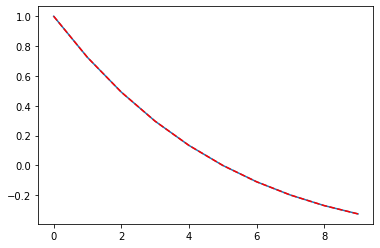

In [27]:
coef = (aux0*u0 + aux1*v0)
u_exact = coef[0]*np.exp(lams[1]*t)*(aux_fac[0]*t*ev0[0]+aux0[0])
plt.plot(t,u_exact)
plt.plot(t,u,'--r')

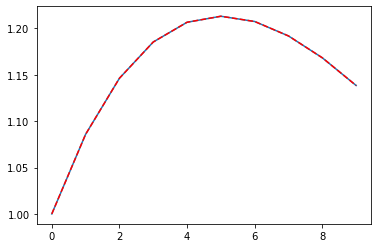

In [28]:
v_exact = coef[0]*np.exp(lams[1]*t)*(aux_fac[0]*t*ev1[0]+aux1[0])
plt.plot(t,v_exact)
plt.plot(t,v,'--r')

In [29]:
# anisotropic case with no dissipation - no change to eigenvector
u0 = np.array([1.])
v0 = -np.array([1.])
alpha = .1
gamma = 0
a = np.full_like(u0, -alpha-gamma)
b = np.full_like(u0, -alpha)
c = np.full_like(u0, alpha)
d = np.full_like(u0, alpha-gamma)
print(((a,b),(c,d)))

((array([-0.1]), array([-0.1])), (array([0.1]), array([0.1])))


In [30]:
lams, evecs = get_lams_evecs(a, b, c, d)

2.874183962866365e-18 [-0.70710678  0.70710678]
2.874183962866365e-18 [-0.70710678  0.70710678]


In [31]:
t = np.arange(10)
u,v = solve_2d_ode_spectral(u0, v0, t, a, b, c, d)
u,v

(array([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.]]),
 array([[-1.],
        [-1.],
        [-1.],
        [-1.],
        [-1.],
        [-1.],
        [-1.],
        [-1.],
        [-1.],
        [-1.]]))

In [32]:
# anisotropic case with no dissipation - auxiliary vector grows linearly
u0 = np.array([1.])
v0 = np.array([1.])
t = np.arange(10)
u,v = solve_2d_ode_spectral(u0, v0, t, a, b, c, d)
u,v

(array([[ 1.00000000e+00],
        [ 8.00000000e-01],
        [ 6.00000000e-01],
        [ 4.00000000e-01],
        [ 2.00000000e-01],
        [-2.22044605e-16],
        [-2.00000000e-01],
        [-4.00000000e-01],
        [-6.00000000e-01],
        [-8.00000000e-01]]),
 array([[1. ],
        [1.2],
        [1.4],
        [1.6],
        [1.8],
        [2. ],
        [2.2],
        [2.4],
        [2.6],
        [2.8]]))

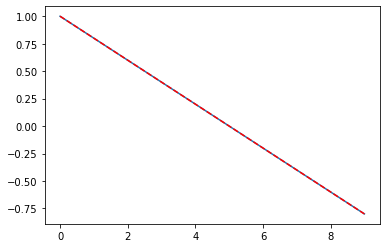

In [33]:
ev0, ev1, aux0, aux1, aux_fac = get_evec_aux(lams[:1],a,b,c,d)
coef = (aux0*u0 + aux1*v0)
u_exact = coef[0]*np.exp(lams[1]*t)*(aux_fac[0]*t*ev0[0]+aux0[0])
plt.plot(t,u_exact)
plt.plot(t,u,'--r')

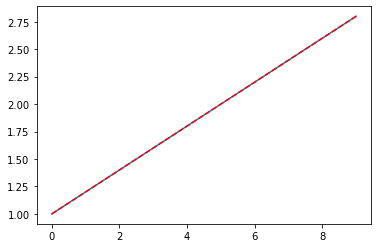

In [34]:
v_exact = coef[0]*np.exp(lams[1]*t)*(aux_fac[0]*t*ev1[0]+aux1[0])
plt.plot(t,v_exact)
plt.plot(t,v,'--r')